<a href="https://colab.research.google.com/github/AzenethSH/Estadistica/blob/main/Apple_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 d√≠a)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta autom√°ticamente los precios de cierre, apertura, m√°ximo y m√≠nimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del √≠ndice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un √≠ndice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Adj Close  \
Date                                                                         
2024-04-10  168.800003  169.089996  167.110001  167.779999      166.991501   
2024-04-11  168.339996  175.460007  168.160004  175.039993      174.217377   
2024-04-12  174.259995  178.360001  174.210007  176.550003      175.720276   
2024-04-15  175.360001  176.630005  172.500000  172.690002      171.878403   
2024-04-16  171.750000  173.759995  168.270004  169.380005      168.584000   
...                ...         ...         ...         ...             ...   
2025-04-01  219.809998  223.679993  218.899994  223.190002      223.190002   
2025-04-02  221.320007  225.190002  221.020004  223.889999      223.889999   
2025-04-03  205.539993  207.490005  201.250000  203.190002      203.190002   
2025-04-04  193.889999  199.880005  187.339996  188.380005      188.380005   
2025-04-07  177.199997  194.149994  174.619995  181.460007      181.460007   

            AAPL_Volume  
Date                     
2024-04-10     49709300  
2024-04-11     91070300  
2024-04-12    101593300  
2024-04-15     73531800  
2024-04-16     73711200  
...                 ...  
2025-04-01     36412700  
2025-04-02     35905900  
2025-04-03    103419000  
2025-04-04    125910900  
2025-04-07    160466300  

[249 rows x 6 columns]

# Medias m√≥viles

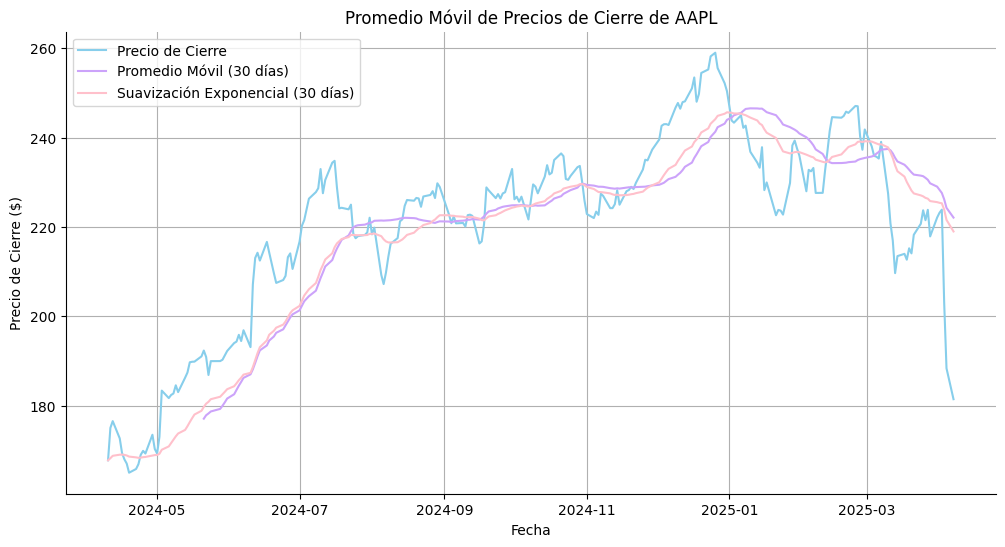

In [3]:
# Promedio M√≥vil Simple
ventana_sma = 30
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio M√≥vil Exponencial
ventana_ses = 30
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='skyblue')
plt.plot(df['SMA'], label=f'Promedio M√≥vil ({ventana_sma} d√≠as)', color='#CCA3FA') #los colores con html se le agrega un gato
plt.plot(df['SES'], label=f'Suavizaci√≥n Exponencial ({ventana_ses} d√≠as)', color='pink')
plt.title('Promedio M√≥vil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El promedio m√≥vil calcula el precio promedio de los √∫ltimos 30 d√≠as, lo que ayuda a identificar la direcci√≥n general del precio, con cruces por encima indicando posibles tendencias alcistas y por debajo sugiriendo tendencias bajistas. La suavizaci√≥n exponencial, similar en su prop√≥sito, otorga una mayor ponderaci√≥n a los precios m√°s recientes, haci√©ndola m√°s sensible a los cambios de precio inmediatos en comparaci√≥n con el promedio m√≥vil simple. En conjunto, estas l√≠neas permiten a los analistas observar la volatilidad del precio diario, discernir la tendencia subyacente a corto plazo y potencialmente identificar puntos de cambio en esta tendencia a trav√©s de los cruces entre el precio de cierre y los promedios m√≥viles. Es fundamental entender que estos indicadores son herramientas de an√°lisis y deben complementarse con otras formas de an√°lisis para fundamentar decisiones de inversi√≥n.

# Prueba Dickey-Fuller Aumentada

In [4]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hip√≥tesis nula (H‚ÇÄ): La serie tiene una ra√≠z unitaria (no es estacionaria).
#Hip√≥tesis alternativa (H‚ÇÅ): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretaci√≥n de la prueba ADF
print('Estad√≠stico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hip√≥tesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).")
#Para deterctar estacionalidad

Estad√≠stico ADF: -1.7739528573286973
p-value: 0.39346788381035025
La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).


# Regresi√≥n polinomial

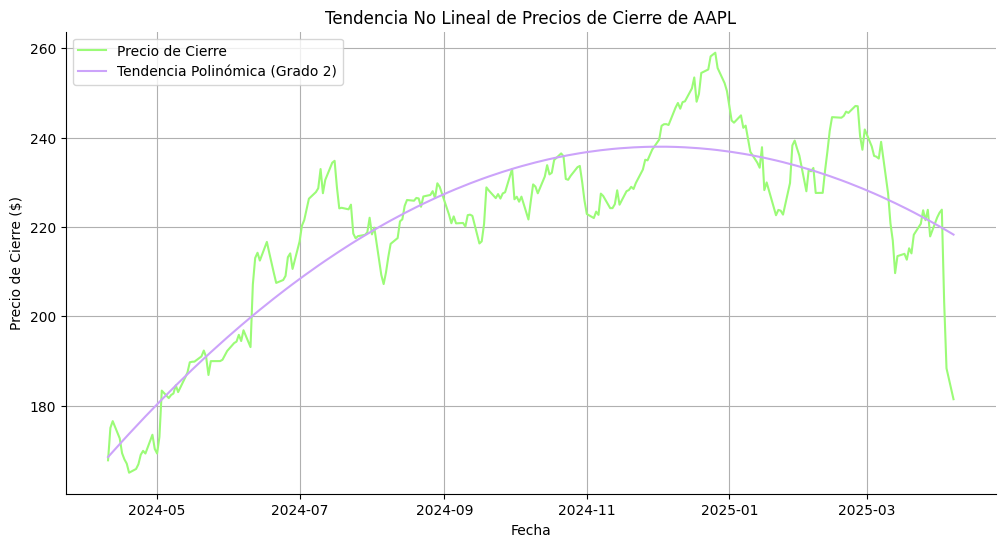

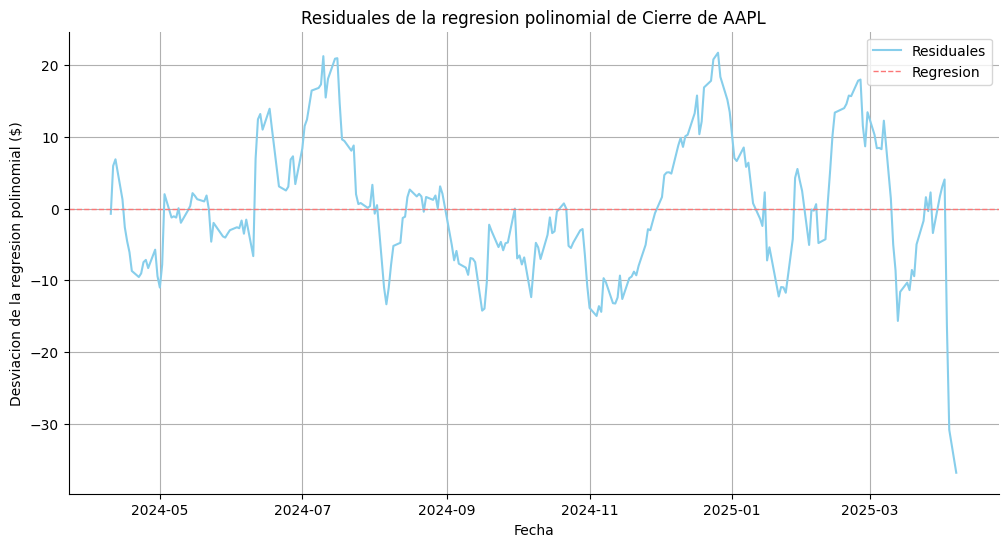

In [5]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a n√∫meros
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polin√≥mico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gr√°fica
plt.figure(
    figsize=(12, 6) # tama√±o (horizontal, vertical)
    )

# qu√© se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecer√° en la leyenda
    color='#9BFB77'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polin√≥mica (Grado {grado})', color='#CCA3FA')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # T√≠tulo
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadr√≠cula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gr√°fico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['Poly_Resid'], label='Residuales', color='skyblue')
plt.axhline(0, color='#FB7777', label='Regresion',linestyle='--', linewidth=1)  # L√≠nea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#Representar la curva de forma m√°s suave

La primera gr√°fica se centr√≥ en modelar la tendencia del precio de cierre a largo plazo utilizando una regresi√≥n polin√≥mica de grado 2. Esta curva revel√≥ una tendencia no lineal, con una fase alcista inicial que culmin√≥ en un punto m√°ximo alrededor de finales de 2024 o principios de 2025, seguida de una fase bajista. Esta representaci√≥n suaviz√≥ las fluctuaciones diarias y ofreci√≥ una visi√≥n de la direcci√≥n general del precio a lo largo del periodo analizado.

La segunda gr√°fica, la de los residuales de esta regresi√≥n polin√≥mica, nos proporcion√≥ informaci√≥n crucial sobre la calidad del ajuste de este modelo de tendencia. Los residuales, que representan la diferencia entre el precio real y el predicho por la curva polin√≥mica, mostraron fluctuaciones considerables alrededor de cero. Esto indica que, si bien la tendencia polin√≥mica de grado 2 captur√≥ la direcci√≥n general del movimiento del precio a largo plazo, no logr√≥ explicar todas las variaciones diarias y a mediano plazo. La magnitud de los residuales se√±al√≥ momentos en los que la predicci√≥n de la tendencia se desvi√≥ significativamente del precio real. La ausencia de un patr√≥n lineal claro en los residuales sugiere que el modelo no tiene un sesgo sistem√°tico obvio, pero las fluctuaciones indican que otros factores, no capturados por la simple tendencia polin√≥mica de segundo grado, influyeron en el precio de AAPL durante este periodo.

## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta raz√≥n, son una herramienta √∫til para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta raz√≥n no les voy a pedir que lo usen. Aqu√≠ lo he simplificado tanto como he podido por si se animan.

In [6]:
# Aqu√≠ no le muevan a nada
# B√°sicamente, lo que se hace este bloque es crear la funci√≥n
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La funci√≥n acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el par√°metro "terminos" es un n√∫mero natural que indica la cantidad de
  t√©rminos que desarrolla la serie. Entre mayor sea el n√∫mero de t√©rminos,
  la serie ser√° m√°s precisa, pero m√°s dif√≠cil de interpretar.

  La funci√≥n tiene como salida una lista con los componentes sinosoidales de serie.
  El √∫ltimo elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta l√≠nea con tu DataFrame y serie espec√≠ficos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en t√©rminos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el √≠ndice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # √≠ndice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la se√±al en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='#779BFB')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

  #Descompone los residuales, y la segunda tabla las suma y las acomoda a su favor

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.008032  889.201137        124.500000
1    0.024096  596.401363         41.500000
2    0.020080  524.679708         49.800000
3    0.016064  372.993586         62.250000
4    0.028112  321.138070         35.571429


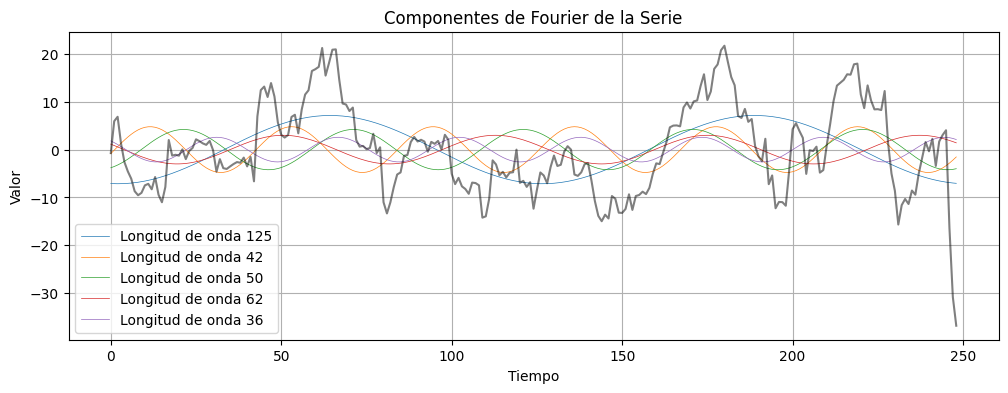

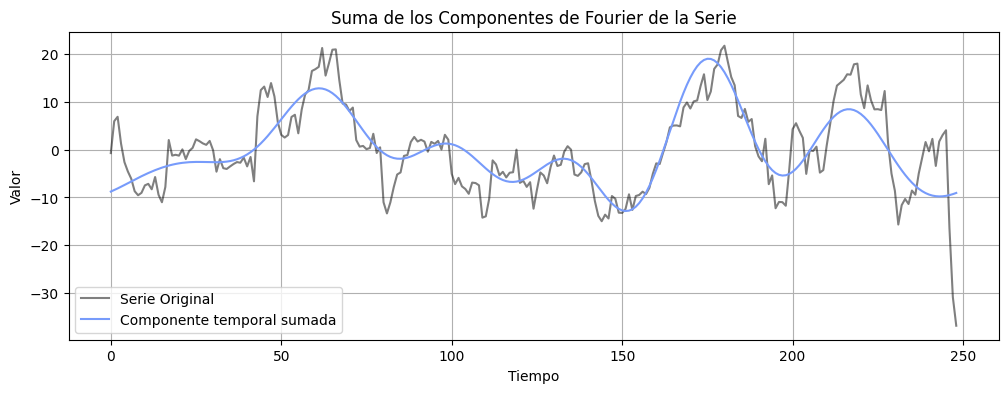

In [7]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estos gr√°ficos, la longitud de onda equivale a la unidad de tiempo (en este caso, d√≠as) que tarda la onda en volver al mismo sitio. Algo que en nuestro contexto podr√≠amos interpretar como estasionalidad. Vemos que la oscilaci√≥n m√°s grande se presenta cada 378 d√≠as. Dado que esto es m√°s de un a√±o, esto ser√≠a m√°s bien un ciclo. Sin embargo, se puede apreciar algo muy interesante, la longitud de onda siguiente es de 126 en unidades de tiempo (d√≠as) que es justo la mitad de la cantidad de d√≠as de negociaci√≥n en un a√±o!!! üòØ

# Gr√°fico de autocorrelaci√≥n

El gr√°fico de autocorrelaci√≥n tiene como eje vertical los valores de la r de Pearson objenidos desplazando la serie hacia atr√°s en el tiempo. La medida de estos desplazamientos se muestra en el eje horizontal "lags". Se puede ver que de fondo hay una especie de sombra, esa sombra muestra el intervalo de confianza con el nivel de significancia que establezcan. Si la r de Pearson para un lag espec√≠fico est√° fuera fuera de esa sombra, hay un nivel de confianza para afirmar que $r\neq0$ y por lo tanto hay correlaci√≥n.
<br>
Este gr√°fico se usa para muchas cosas. Nosotros lo intentamos usar para obtener la estacionalidad, pero tambi√©n se usa para obtener algunos par√°metros del modelo ARIMA.

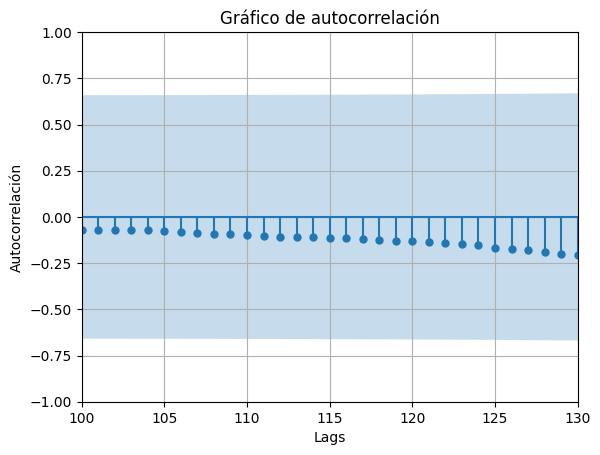

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gr√°fico de autocorrelaci√≥n')
plt.xlabel('Lags')
plt.ylabel('Autocorrelaci√≥n')
plt.grid()
plt.show()

Finalmente, el gr√°fico de autocorrelaci√≥n de los residuales, para los lags examinados, no evidencia una autocorrelaci√≥n estad√≠sticamente significativa, lo que sugiere que los errores del modelo son relativamente aleatorios para estos rezagos. En conjunto, el precio de AAPL presenta una tendencia no lineal a largo plazo con fluctuaciones a corto plazo, y aunque un modelo polin√≥mico de segundo grado captura la direcci√≥n general, no explica completamente la din√°mica del precio, cuyos errores parecen ser independientes para los rezagos m√°s largos analizados.

# Gr√°fico de autocorrelaci√≥n parcial (PACF)

Su prop√≥sito principal es ayudar a identificar el orden de dependencia en una serie temporal (√∫til para ARIMA), es decir, cu√°ntos valores anteriores est√°n correlacionados con el valor actual, despu√©s de eliminar el efecto de las observaciones intermedias.

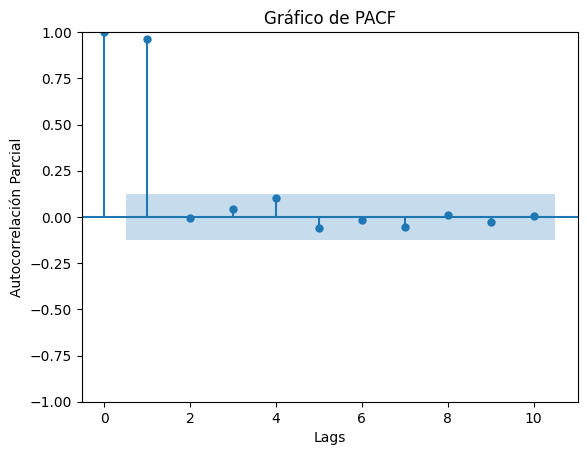

In [9]:
# Generar el gr√°fico PACF
from statsmodels.graphics.tsaplots import plot_pacf

nivel_de_significancia = 0.05
plot_pacf(df['AAPL_Close'], lags=10, alpha=nivel_de_significancia)
plt.title('Gr√°fico de PACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelaci√≥n Parcial')
plt.show()


# Descomposici√≥n de la serie

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

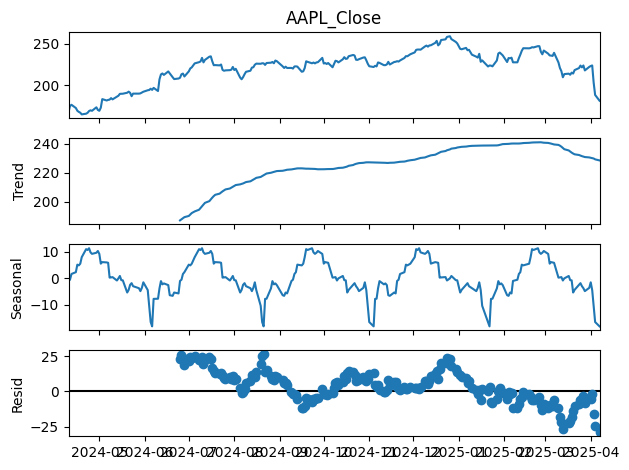

In [10]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=52,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 d√≠as de negociaci√≥n al a√±o
fig = descomposicion.plot()
plt.show()

el ruido siempre se va a llevar un poco de estacionalidad
el ruido no debe tener tendencia, debe ser estacionario\
¬°Claro! Esta gr√°fica muestra la descomposici√≥n de la serie temporal del precio de cierre de AAPL en sus componentes: tendencia, estacionalidad y residuo.

El primer panel superior muestra la serie temporal original del precio de cierre de AAPL a lo largo del tiempo. El segundo panel ilustra la tendencia subyacente del precio, representando el movimiento a largo plazo despu√©s de eliminar las fluctuaciones a corto plazo y la estacionalidad. Se observa una tendencia alcista general hasta mediados de 2025, seguida de un descenso. El tercer panel exhibe la componente estacional, que captura patrones repetitivos dentro de un periodo fijo. En este caso, parece haber una estacionalidad con fluctuaciones regulares a lo largo del a√±o. Finalmente, el cuarto panel muestra los residuales o el ruido, que son las fluctuaciones irregulares que no se explican por la tendencia ni la estacionalidad. Estos residuales deber√≠an ser aleatorios si el modelo de descomposici√≥n captura adecuadamente los componentes de la serie temporal.

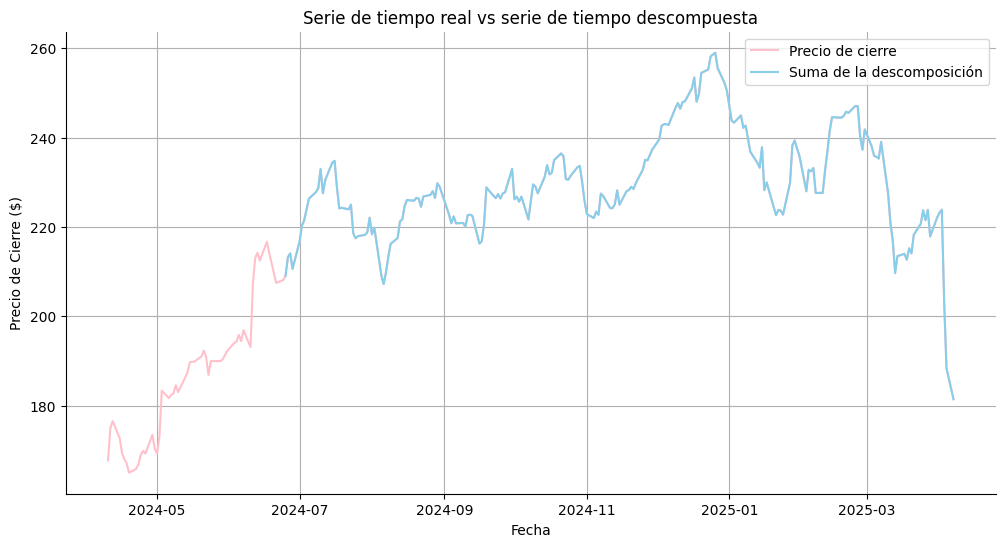

In [11]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='pink')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='skyblue')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

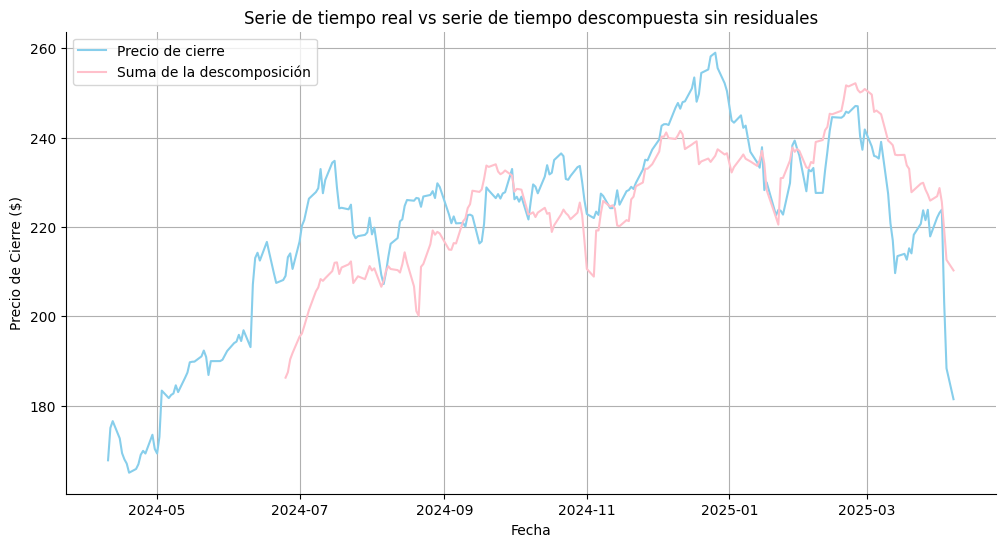

In [12]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposici√≥n', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

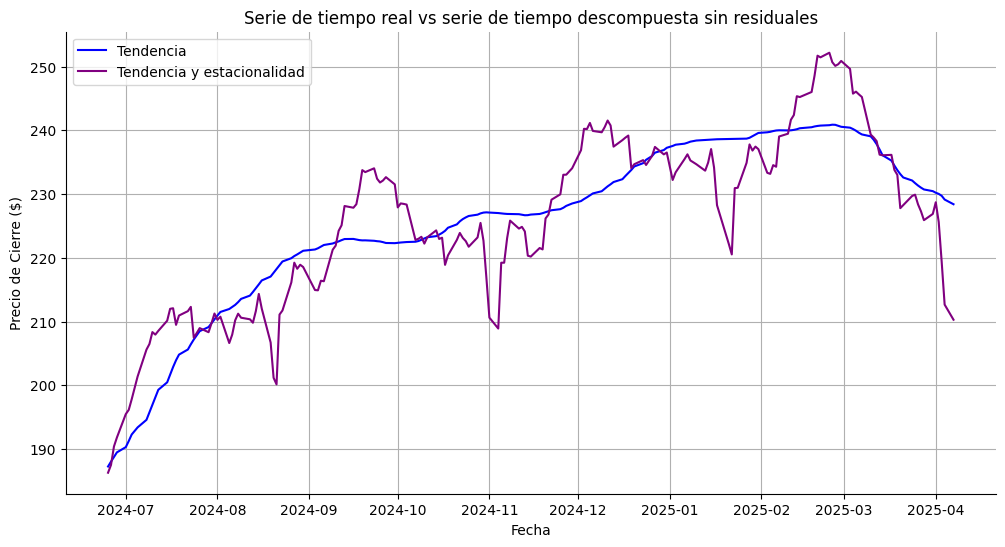

In [13]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gr√°fico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gr√°fico.

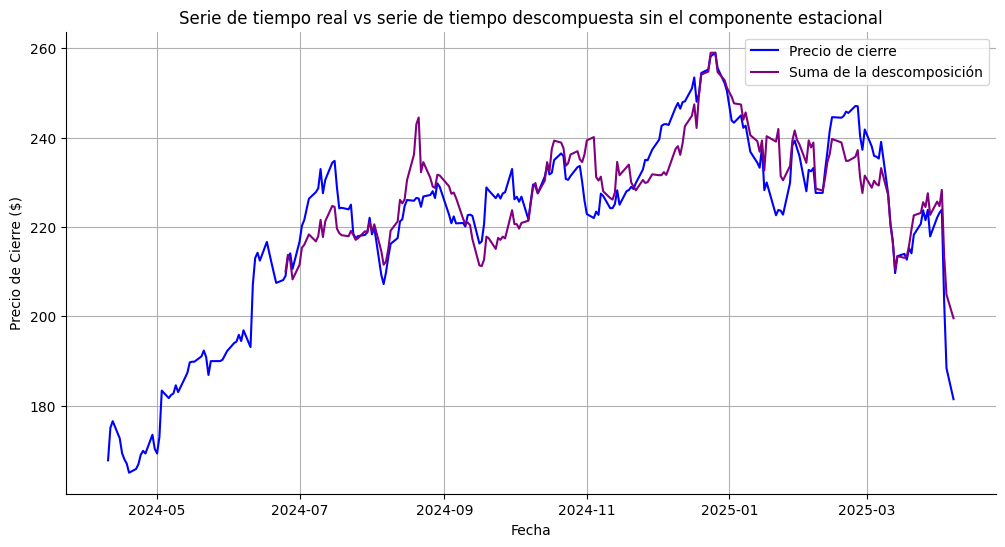

In [14]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [15]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hip√≥tesis nula (H‚ÇÄ): Ambas series son iguales.
#Hip√≥tesis alternativa (H‚ÇÅ): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estad√≠stico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretaci√≥n de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estad√≠stico t: -0.5430399579176226
Valor p: 0.5877193063481974


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.
Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [16]:
from scipy.stats import wilcoxon

# Prueba Wilcoxon pareada para el efecto significativo de la estacionalidad

#Hip√≥tesis nula (H‚ÇÄ): Ambas series son iguales.
#Hip√≥tesis alternativa (H‚ÇÅ): Ambas series son diferentes

tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba de Wilcoxon
w_stat, p_valor = wilcoxon(tendencia, tendencia_estacionalidad)

print("Estad√≠stico de Wilcoxon:", w_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretaci√≥n de los resultados
if p_valor < 0.05:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estad√≠stico de Wilcoxon: 9355.0
Valor p: 0.6206823441713512


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.
Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


Considerando todas las gr√°ficas analizadas, el precio de cierre de AAPL entre abril de 2024 y abril de 2025 exhibi√≥ una tendencia no lineal a largo plazo, inicialmente alcista con un pico a finales de 2024 o principios de 2025, seguida de un descenso. A corto plazo, el precio mostr√≥ volatilidad, con tendencias que pudieron identificarse mediante promedios m√≥viles y suavizaci√≥n exponencial. Un an√°lisis de descomposici√≥n de la serie temporal revel√≥ adem√°s una tendencia subyacente similar a la observada con la regresi√≥n polin√≥mica, una componente estacional con fluctuaciones regulares a lo largo del a√±o, y residuales que representan el ruido o las fluctuaciones no explicadas por la tendencia y la estacionalidad. El an√°lisis de los residuales de la regresi√≥n polin√≥mica indic√≥ que, si bien el modelo captur√≥ la direcci√≥n general, no explic√≥ completamente la variabilidad del precio, aunque para rezagos m√°s largos (100-130), no se encontr√≥ una autocorrelaci√≥n significativa en los errores. En general, el precio de AAPL durante este periodo estuvo influenciado por una combinaci√≥n de una tendencia a largo plazo, patrones estacionales y fluctuaciones irregulares, con la tendencia a largo plazo mostrando un comportamiento no lineal.